In [1]:
# R SVM
# https://github.com/DSPavan/PyClassNotes/blob/master/LGD_DATA.csv
# RAW LINK -  NOTE
data <- read.csv("C:\\Users\\radha31\\Downloads\\cereals.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

print(str(data))


'data.frame':	74 obs. of  16 variables:
 $ name    : chr  "100%_Bran" "100%_Natural_Bran" "All-Bran" "All-Bran_with_Extra_Fiber" ...
 $ mfr     : chr  "N" "Q" "K" "K" ...
 $ type    : chr  "C" "C" "C" "C" ...
 $ calories: int  70 120 70 50 110 110 110 130 90 90 ...
 $ protein : int  4 3 4 4 2 2 2 3 2 3 ...
 $ fat     : int  1 5 1 0 2 2 0 2 1 0 ...
 $ sodium  : int  130 15 260 140 200 180 125 210 200 210 ...
 $ fiber   : num  10 2 9 14 1 1.5 1 2 4 5 ...
 $ carbo   : num  5 8 7 8 14 10.5 11 18 15 13 ...
 $ sugars  : int  6 8 5 0 8 10 14 8 6 5 ...
 $ potass  : int  280 135 320 330 -1 70 30 100 125 190 ...
 $ vitamins: int  25 0 25 25 25 25 25 25 25 25 ...
 $ shelf   : int  3 3 3 3 3 1 2 3 1 3 ...
 $ weight  : num  1 1 1 1 1 1 1 1.33 1 1 ...
 $ cups    : num  0.33 1 0.33 0.5 0.75 0.75 1 0.75 0.67 0.67 ...
 $ rating  : num  68.4 34 59.4 93.7 34.4 ...
NULL


In [2]:
library("dplyr")
finaldf <- select(data, mfr,calories,sugars,sodium)
    
finaldf <- mutate(finaldf, mfrnum = ifelse(mfr == "N" ,0 ,
                                    ifelse(mfr == "Q",1 ,
                                    ifelse(mfr == "K",2 ,
                                    ifelse(mfr == "A",3 ,
                                    ifelse(mfr == "G",4 ,
                                    ifelse(mfr == "P",5 ,
                                    ifelse(mfr == "R" ,6 ,7
                                                  ))) ))) ))
                  
finaldf <- select(finaldf, mfrnum,calories,sugars,sodium)

head(finaldf)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



mfrnum,calories,sugars,sodium
0,70,6,130
1,120,8,15
2,70,5,260
2,50,0,140
6,110,8,200
4,110,10,180


mfrnum,calories,sugars
0,70,6
1,120,8
2,70,5
2,50,0
6,110,8
4,110,10


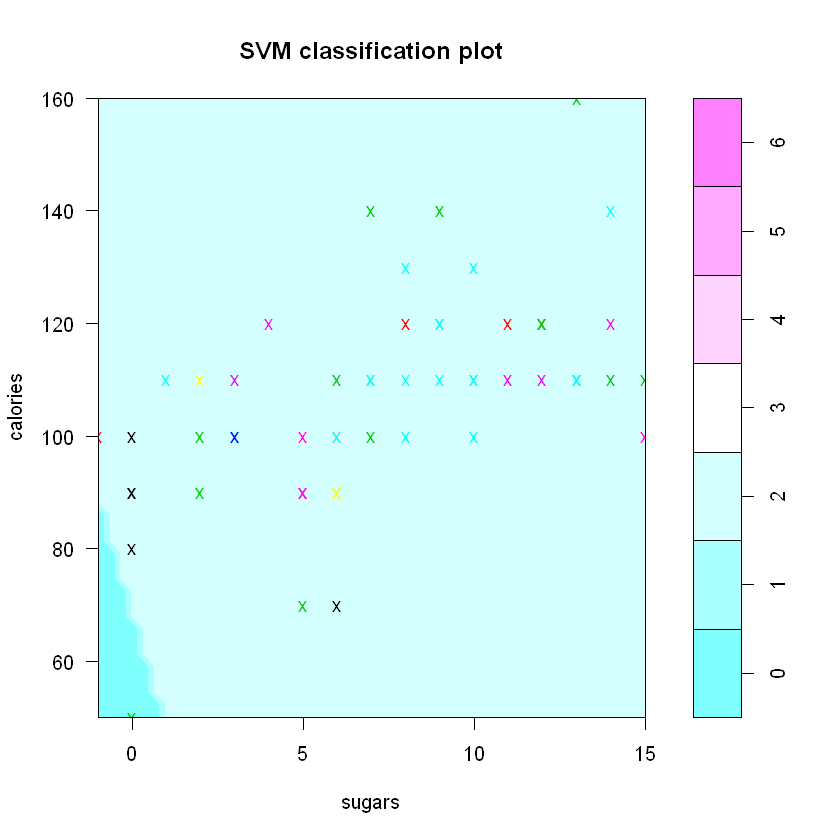

In [20]:
library(e1071)
finaldf$mfrnum = factor(finaldf$mfrnum)
head(finaldf)

finaldf = finaldf[, c(2,3,1)]
# iris.part = iris.part[, c(3,4,5)]
fit = svm(mfrnum ~ ., data=finaldf, 
          type='C-classification', kernel='linear')
plot(fit, finaldf)

In [21]:
table(finaldf$mfrnum)


 0  1  2  3  4  5  6 
 6  8 23  1 22  8  6 

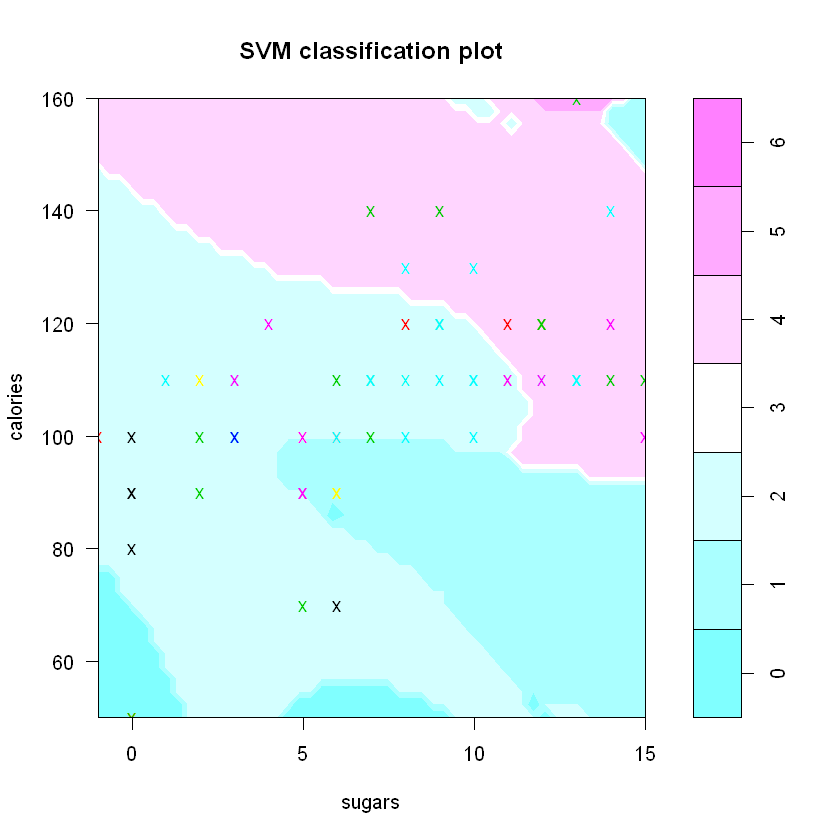

In [22]:
# kernel linear, polynomial, radial,sigmoid
# Type
# C-classification
# nu-classification
# one-classification (for novelty detection)
# eps-regression
# nu-regression

           
fit = svm(mfrnum ~ ., data=finaldf, 
          type='C-classification', kernel='sigmoid')
plot(fit, finaldf)

In [23]:
table(finaldf$mfrnum)


 0  1  2  3  4  5  6 
 6  8 23  1 22  8  6 

In [27]:
finaldf = subset(finaldf, mfrnum != 3) # , Species != 'setosa'
#finaldf = subset(finaldf, mfrnum == 3) # , Species != 'setosa'
head(finaldf)

mfrnum,calories,sugars
0,70,6
1,120,8
2,70,5
2,50,0
6,110,8
4,110,10


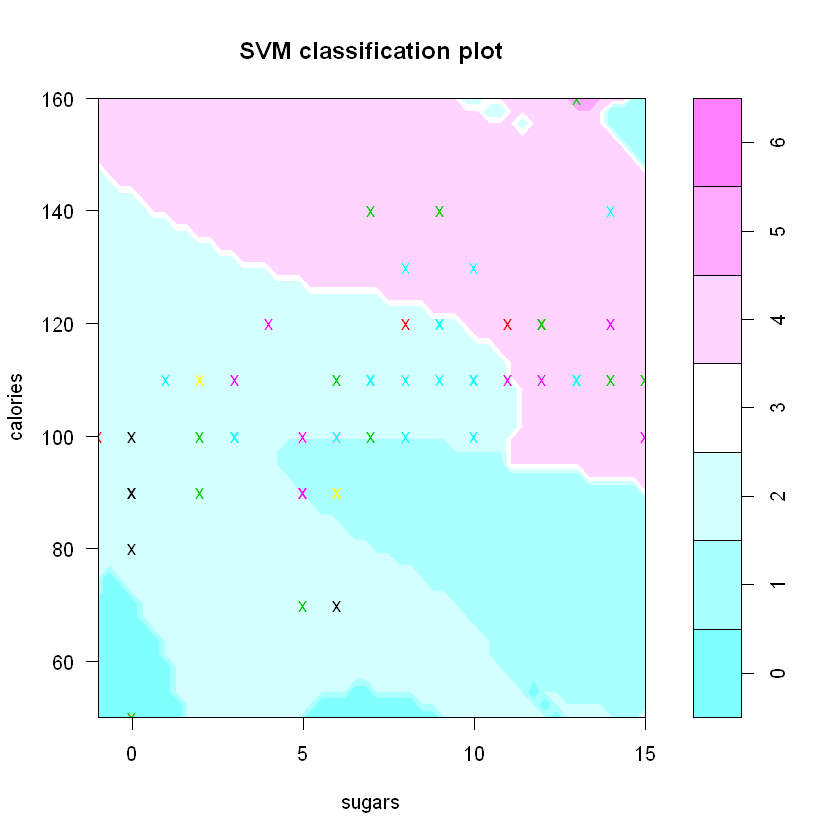

In [28]:
finaldf = finaldf[, c(2,3,1)]
# iris.part = iris.part[, c(3,4,5)]
fit = svm(mfrnum ~ ., data=finaldf, 
          type='C-classification', kernel='sigmoid')
plot(fit, finaldf)

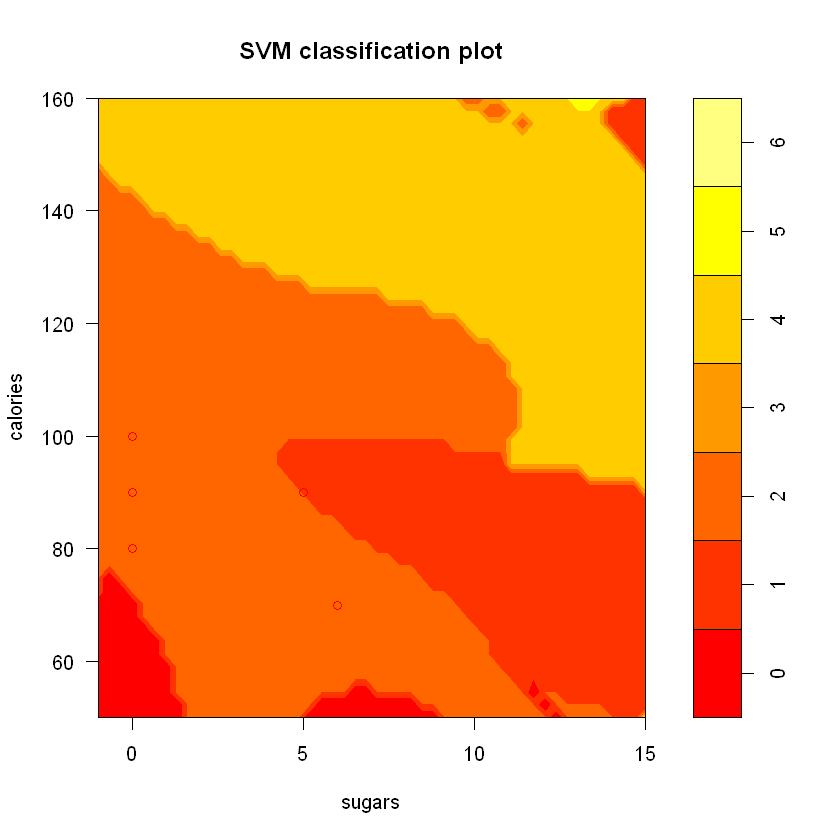

In [33]:
## plot with custom symbols and colors
plot(fit, finaldf, svSymbol = 1, dataSymbol = 2, symbolPalette = rainbow(1),color.palette = heat.colors)

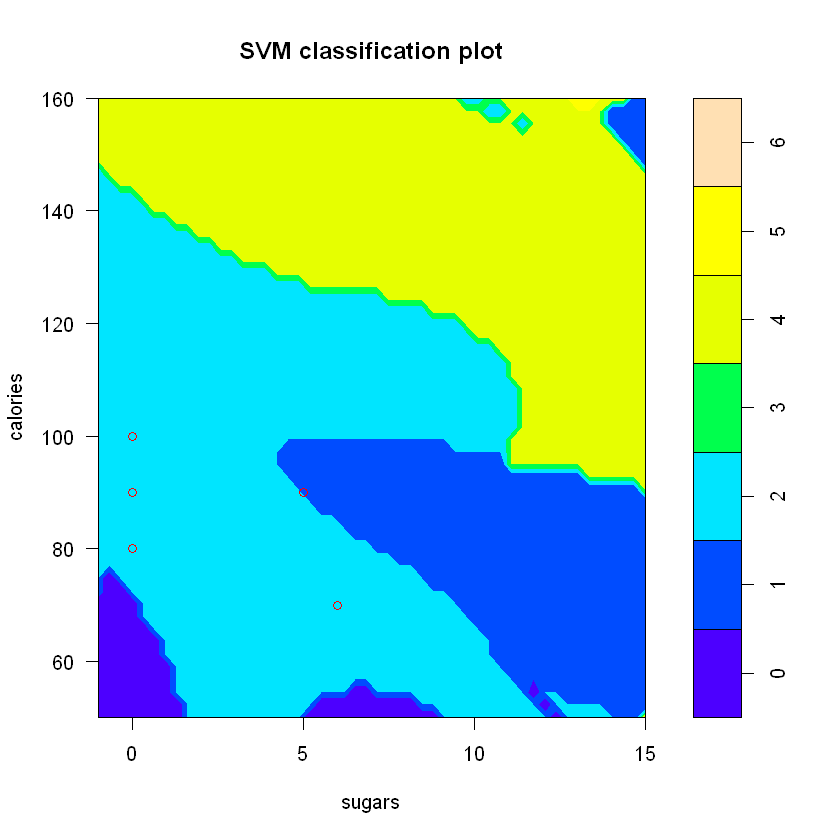

In [38]:
## plot with custom symbols and colors
plot(fit, finaldf, svSymbol = 1, dataSymbol = 2, symbolPalette = rainbow(1),color.palette = topo.colors)

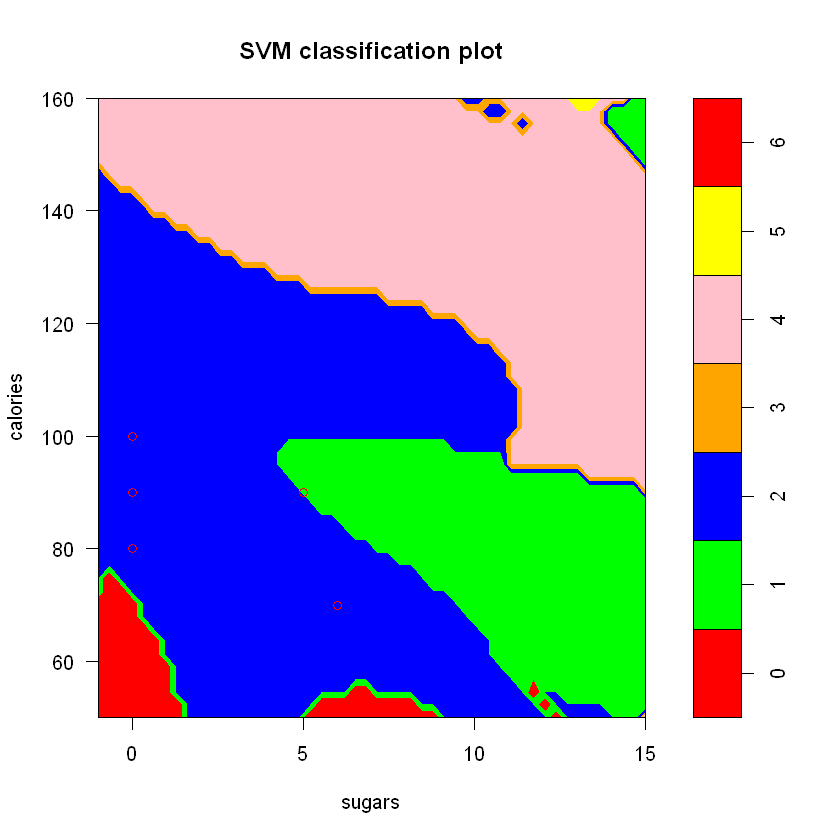

In [42]:
## plot with custom symbols and colors
plot(fit, finaldf, svSymbol = 1, dataSymbol = 2, symbolPalette = rainbow(1),
     col = c("red","green","blue","orange","pink","yellow"))

In [45]:
library(rgl)
library(misc3d)
##install.packages("misc3d")

In [48]:
# plot3d(finaldf, col = c("red","green","blue","orange","pink","yellow"))


'data.frame':	74 obs. of  16 variables:
 $ name    : chr  "100%_Bran" "100%_Natural_Bran" "All-Bran" "All-Bran_with_Extra_Fiber" ...
 $ mfr     : chr  "N" "Q" "K" "K" ...
 $ type    : chr  "C" "C" "C" "C" ...
 $ calories: int  70 120 70 50 110 110 110 130 90 90 ...
 $ protein : int  4 3 4 4 2 2 2 3 2 3 ...
 $ fat     : int  1 5 1 0 2 2 0 2 1 0 ...
 $ sodium  : int  130 15 260 140 200 180 125 210 200 210 ...
 $ fiber   : num  10 2 9 14 1 1.5 1 2 4 5 ...
 $ carbo   : num  5 8 7 8 14 10.5 11 18 15 13 ...
 $ sugars  : int  6 8 5 0 8 10 14 8 6 5 ...
 $ potass  : int  280 135 320 330 -1 70 30 100 125 190 ...
 $ vitamins: int  25 0 25 25 25 25 25 25 25 25 ...
 $ shelf   : int  3 3 3 3 3 1 2 3 1 3 ...
 $ weight  : num  1 1 1 1 1 1 1 1.33 1 1 ...
 $ cups    : num  0.33 1 0.33 0.5 0.75 0.75 1 0.75 0.67 0.67 ...
 $ rating  : num  68.4 34 59.4 93.7 34.4 ...
NULL


name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1,0.33,68.40297
100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1,1.00,33.98368
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1,0.33,59.42551
All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1,0.50,93.70491
Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1,0.75,34.38484
Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.50954


mfrnum,calories,sugars,sodium,rating
0,70,6,130,68.40297
1,120,8,15,33.98368
2,70,5,260,59.42551
2,50,0,140,93.70491
6,110,8,200,34.38484
4,110,10,180,29.50954


mfrnum,calories,sugars,sodium,rating
0,70,6,130,68.40297
1,120,8,15,33.98368
2,70,5,260,59.42551
2,50,0,140,93.70491
6,110,8,200,34.38484
4,110,10,180,29.50954


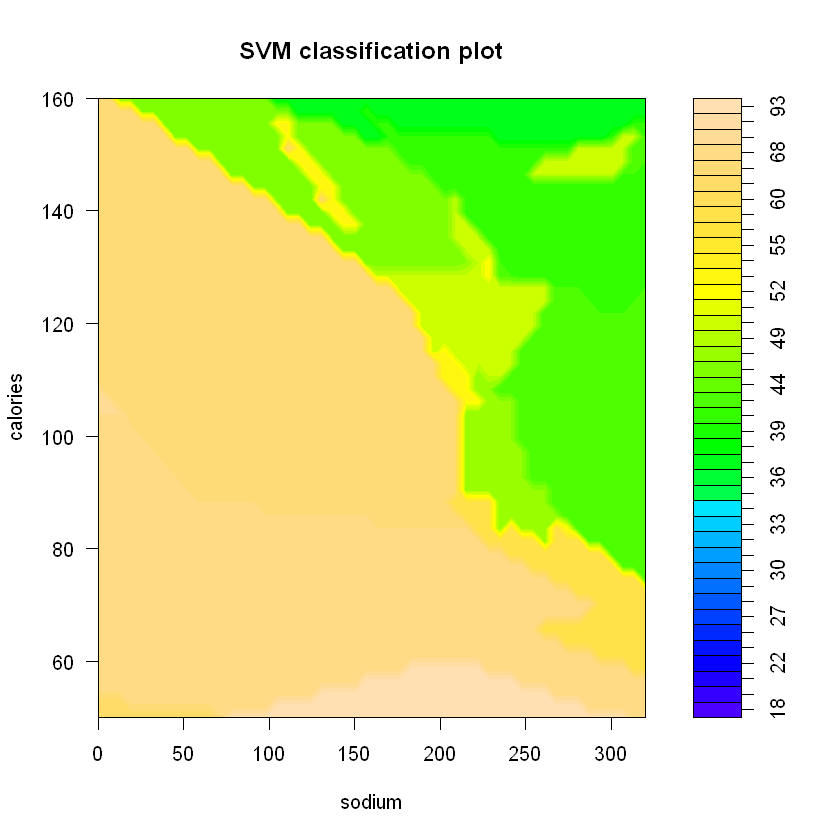

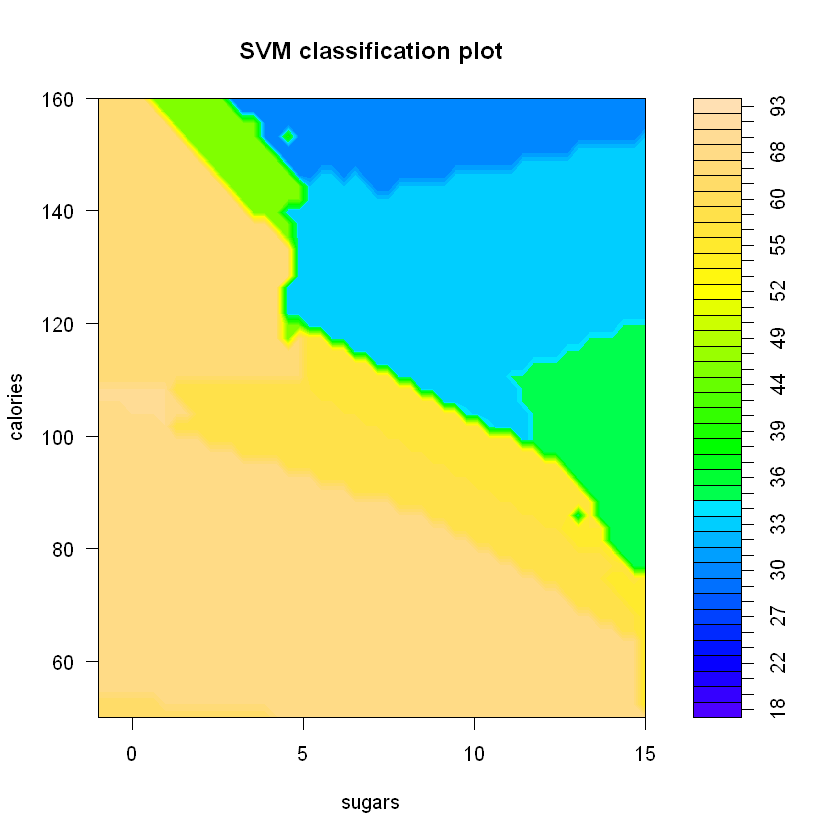


Call:
svm(formula = rating ~ ., data = finaldf, type = "C-classification", 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.1 

Number of Support Vectors:  74

 ( 2 2 3 1 1 2 2 3 3 1 2 1 5 2 4 3 2 1 2 4 1 1 3 1 3 1 1 1 4 1 1 2 1 1 1 1 1 1 1 1 )


Number of Classes:  40 

Levels: 
 18 19 21 22 23 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 44 45 46 49 50 51 52 53 54 55 58 59 60 63 64 68 72 74 93




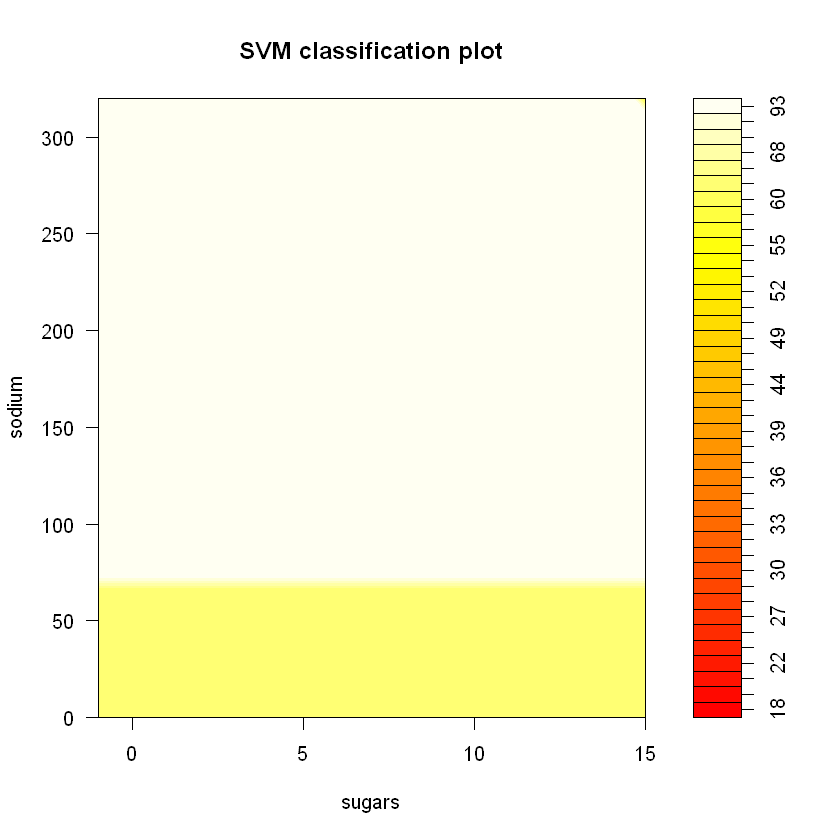

In [6]:
data <- read.csv("C:\\Users\\radha31\\Downloads\\cereals.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

print(str(data))
head(data)
library("dplyr")
finaldf <- select(data, mfr,calories,sugars,sodium,rating)

finaldf <- mutate(finaldf, mfrnum = ifelse(mfr == "N" ,0 ,
                                           ifelse(mfr == "Q",1 ,
                                                  ifelse(mfr == "K",2 ,
                                                         ifelse(mfr == "A",3 ,
                                                                ifelse(mfr == "G",4 ,
                                                                       ifelse(mfr == "P",5 ,
                                                                              ifelse(mfr == "R" ,6 ,7
                                                                              ))) ))) ))

finaldf <- select(finaldf, mfrnum,calories,sugars,sodium, rating)
head(finaldf)
library(e1071)
finaldf$mfrnum = factor(finaldf$mfrnum)
head(finaldf)


finaldf$rating <- as.integer(finaldf$rating)

fit <- svm(rating ~ ., data=finaldf, 
           type='C-classification', kernel='linear')



fit <- svm(rating ~ ., data=finaldf, 
           type='C-classification', kernel='linear')



plot(fit, finaldf, calories ~ sodium ,
    color.palette =  topo.colors,
     )

plot(fit, finaldf, calories ~ sugars,  
     color.palette =  topo.colors)

plot(fit, finaldf, sodium ~ sugars,  
     color.palette =  heat.colors)

summary(fit)


In [7]:
library(car)
library(RJSplot)

#scatter3d(finaldf$rating,finaldf$calories , finaldf$sodium)


Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

